# Predicting the Sale Price of Bulldozers using Machine Learning

## Problem definito
> How weel can we predict the feature sale price of bulldozer, given its characteristic
and previous example of how much similar bulldozers have been sold for

In [1]:
# import library needed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import sklearn

from sklearn.model_selection import train_test_split

## Data
the data is downloade from Kaggle Bluebook for Bulldozers competition

there are 3main datasets 

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30,
2012 You make predictions on this set throughout the majority of the competition.
Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the
competition. It contains data from May 1, 2012 - November 2012. Your score on
the test set determines your final rank for the competition.

In [2]:
# import the adat
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", parse_dates=["saledate"],low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe(include='all')

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05,73670,412698,...,102916,102261,102332,102261,102193,80712,81875,81877,71564,71522
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,19,29,3,3,3,2,10,7,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35832,NaN,...,82444,81539,85074,92924,86998,80692,39633,71447,70169,70774
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03,NaN,2004-10-19 01:54:17.182733952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,NaN,1989-01-17 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,NaN,2000-12-06 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,NaN,2006-06-28 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03,NaN,2009-05-28 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06,NaN,2012-04-28 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<Axes: xlabel='saledate', ylabel='SalePrice'>

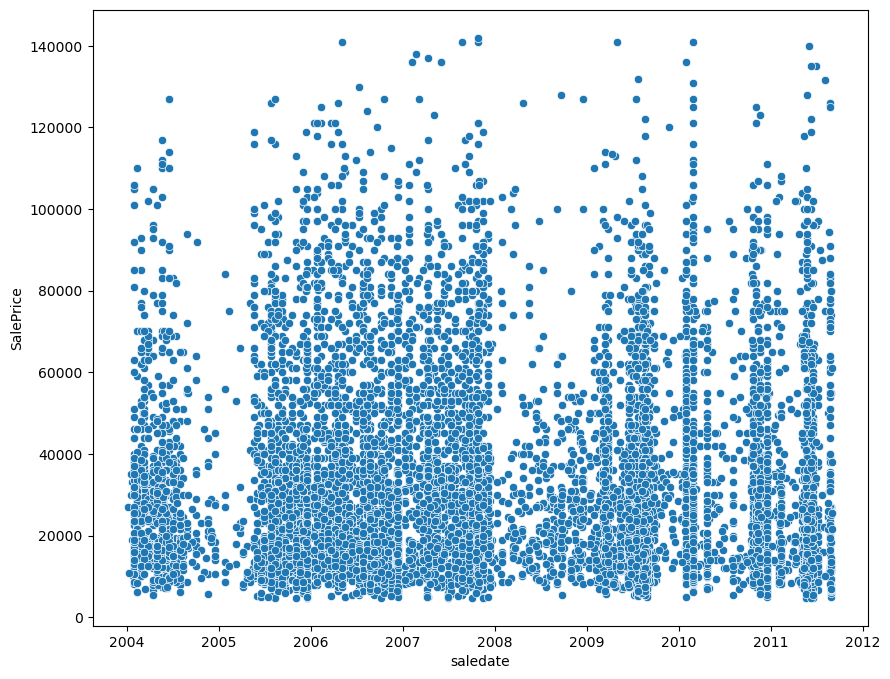

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df[:10000], x="saledate", y="SalePrice")

In [8]:
df_temp = df.sort_values(by="saledate")

In [9]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### add datetime parameters for saledate columns

In [10]:
df_temp["saleyear"] = df_temp["saledate"].dt.year
df_temp["salemonth"] = df_temp["saledate"].dt.month
df_temp["saleday"] = df_temp["saledate"].dt.day
df_temp["saledayofweek"] = df_temp["saledate"].dt.dayofweek
df_temp["saledayofyear"] = df_temp["saledate"].dt.dayofyear

In [11]:
df_temp.T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [12]:
df_temp.drop(columns=['saledate'], inplace=True)

In [13]:
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

### Converst string into pandas categories

In [14]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [15]:
pd.api.types.is_string_dtype(df_temp["Hydraulics"])

False

In [16]:
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [17]:
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [18]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [19]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [20]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [21]:
df_temp.isna().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Fill Missin value

### Fillling numeric missing value

In [22]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [23]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if df_temp[label].isna().sum():
            df_temp[label+"_is_missing"] = pd.isnull(content)
            df_temp[label].fillna(content.median(), inplace=True)

In [24]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isna().sum():
            print(label)

### Filling and turning categorical variables into numbres

In [25]:
for label, content, in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+"_is_missing"] = pd.isna(content)
        df_temp[label] = pd.Categorical(content).codes + 1

In [26]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 89.3 MB


In [27]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

C:\Users\farha\OneDrive\Documents\prgram\bulldozers-project\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\farha\OneDrive\Documents\prgram\bulldozers-project\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


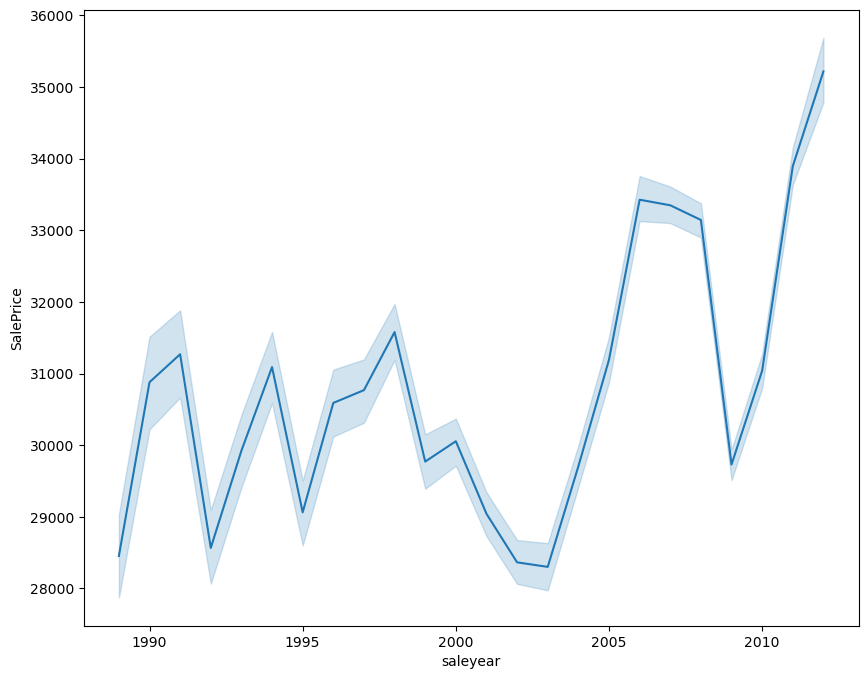

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=df_temp, x=df_temp["saleyear"], y=df_temp["SalePrice"], ax=ax);

## Modelling

In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [30]:
%%time
model.fit(df_temp.drop(columns=["SalePrice"]), df_temp["SalePrice"])

CPU times: total: 36min 2s
Wall time: 9min 51s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [31]:
%%time
model.score(df_temp.drop(columns=["SalePrice"]), df_temp["SalePrice"])

CPU times: total: 34.2 s
Wall time: 11.5 s


0.9875468079970562

## Splitting data into train/valiation sets

In [32]:
df_val = df_temp[df_temp['saleyear'] == 2012]
df_train = df_temp[df_temp['saleyear'] != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [33]:
X_train, y_train = df_train.drop(columns=['SalePrice']), df_train['SalePrice']
X_val, y_val = df_val.drop(columns=['SalePrice']), df_val['SalePrice'] 

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [35]:

X = df_temp.drop(columns=['SalePrice'])
y = df_temp['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error)
between the actual and predicted auction prices.

** Note The goal for most regression evaluation metrics is to minimize the error.

## Build an evaluation function

In [36]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_pred):
    """
    Calculate mean squared log error between prediction and true labels
    """
    
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds), 
              "Validation MAE" : mean_absolute_error(y_val, val_preds), 
              "Traing RMSLE" : rmsle(y_train, train_preds), 
              "Validation RMSLE" : rmsle(y_val, val_preds), 
              "Training R^2" : r2_score(y_train, train_preds), 
              "Validation R^2" : r2_score(y_val, val_preds)}
    return scores


## Testing our model on a subset (to tune the hyperparameters)

In [37]:
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(X_train, y_train)

CPU times: total: 1min 17s
Wall time: 22.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [38]:
 show_scores(model)

{'Training MAE': 5558.7422378073525,
 'Validation MAE': 6731.207862265618,
 'Traing RMSLE': 0.2566952960905171,
 'Validation RMSLE': 0.277366965758838,
 'Training R^2': 0.8618562078386289,
 'Validation R^2': 0.8522990892773596}

In [39]:
grid = {'n_estimators':np.arange(100,1000,100), 
        'max_features': [0.5, 1, 'auto', 'sqrt'],
        'max_depth':[3,5,10], 
        'max_samples':[10000],
        'min_samples_leaf': np.arange(2,20,2),
        'min_samples_split':np.arange(2,20,2), 
        'bootstrap': [True, False]}

In [156]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rfs_model = RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1), 
                                   random_state=42, 
                                   param_distributions=grid, 
                                   n_iter=20, 
                                   cv=5, 
                                   verbose=True)
rfs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\farha\OneDrive\Documents\prgram\bulldozers-project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\farha\OneDrive\Documents\prgram\bulldozers-project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\farha\OneDrive\Documents\prgram\bulldozers-project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

CPU times: total: 9min 50s
Wall time: 43min 57s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42, verbose=True)

In [160]:
# Find best model hyperparameters
rfs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 12,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10,
 'bootstrap': True}

In [42]:
show_scores(rfs_model)

{'Training MAE': 7111.900629007698,
 'Validation MAE': 8083.603044925374,
 'Traing RMSLE': 0.3144406736800815,
 'Validation RMSLE': 0.3269201760144895,
 'Training R^2': 0.7864520721116386,
 'Validation R^2': 0.7937543604372104}

In [161]:
%%time
ideal_model = RandomForestRegressor(n_estimators= 200, 
                                    min_samples_split= 8, 
                                    min_samples_leaf= 12, 
                                    max_samples= 10000, 
                                    max_features= 0.5, 
                                    max_depth= 10, 
                                    bootstrap= True, 
                                    n_jobs=-1, random_state=42)
ideal_model.fit(X_train, y_train)

CPU times: total: 48.8 s
Wall time: 15.2 s


RandomForestRegressor(max_depth=10, max_features=0.5, max_samples=10000,
                      min_samples_leaf=12, min_samples_split=8,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [162]:
show_scores(ideal_model)

{'Training MAE': 7081.825635834464,
 'Validation MAE': 8043.239852858793,
 'Traing RMSLE': 0.31327733055273405,
 'Validation RMSLE': 0.3251059988403552,
 'Training R^2': 0.7876368943417158,
 'Validation R^2': 0.7956322676561487}

## Make prediction on test data

In [143]:
def preprocess_data(df):
    """
    Performs transformation on df and returns transformed df
    """
    
    df['saleyear'] = df['saledate'].dt.year
    df['salemonth'] = df['saledate'].dt.month
    df['saleday'] = df['saledate'].dt.day
    df['saledayofweek'] = df['saledate'].dt.dayofweek
    df['saledayofyear'] = df['saledate'].dt.dayofyear

    df = df.drop(columns=['saledate'])

    for label, content in df.items():
        # Fill the numeric row with median
        if pd.api.types.is_numeric_dtype(content):
            if pd.isna(content).sum():
                df[label+'_is_missing'] = pd.isna(content)
                df[label] = df[label].fillna(content.median)
                                             
        if pd.api.types.is_object_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()

        # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df_temp[label] = content.astype("category").cat.as_ordered()
            if pd.isna(content).sum():
                
                df[label+'_is_missing'] = pd.isna(content)
                df[label] = pd.Categorical(content).codes + 1

    return df


    

In [144]:
df_test= pd.read_csv('bluebook-for-bulldozers/Test.csv', low_memory=False, parse_dates=['saledate'])

In [145]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [146]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [147]:
df_test_temp = preprocess_data(df_test)

In [148]:
df_test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 95 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   SalesID                              12457 non-null  int64   
 1   MachineID                            12457 non-null  int64   
 2   ModelID                              12457 non-null  int64   
 3   datasource                           12457 non-null  int64   
 4   auctioneerID                         12457 non-null  int64   
 5   YearMade                             12457 non-null  int64   
 6   MachineHoursCurrentMeter             12457 non-null  object  
 7   UsageBand                            12457 non-null  int8    
 8   fiModelDesc                          12457 non-null  category
 9   fiBaseModel                          12457 non-null  category
 10  fiSecondaryDesc                      12457 non-null  int8    
 11  fiModelSeries  

In [149]:
df_test_temp.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 95, dtype: int64

In [150]:
missing_columns = set(X_train.columns) -  set(df_test_temp.columns)

In [151]:
for label in missing_columns:
    df_test_temp[label] = False

In [152]:
df_test_temp[['ProductGroupDesc_is_missing',
 'ProductGroup_is_missing',
 'auctioneerID_is_missing',
 'fiBaseModel_is_missing',
 'fiModelDesc_is_missing',
 'fiProductClassDesc_is_missing',
 'state_is_missing']]

,ProductGroupDesc_is_missing,ProductGroup_is_missing,auctioneerID_is_missing,fiBaseModel_is_missing,fiModelDesc_is_missing,fiProductClassDesc_is_missing,state_is_missing
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
12452,False,False,False,False,False,False,False
12453,False,False,False,False,False,False,False
12454,False,False,False,False,False,False,False
12455,False,False,False,False,False,False,False


In [153]:
df_test_temp_columns = list(df_test_temp.columns)
x_train_columns = list(X_train.columns)

In [154]:
same_column = 0
for i in range(len(df_test_temp_columns)):
    for j in range(len(x_train_columns)):
        if df_test_temp_columns[i] == x_train_columns[j]:
            print(f"{df_test_temp_columns[i]} ,{x_train_columns[j]}")
            same_column += 1
            
same_column

SalesID ,SalesID
MachineID ,MachineID
ModelID ,ModelID
datasource ,datasource
auctioneerID ,auctioneerID
YearMade ,YearMade
MachineHoursCurrentMeter ,MachineHoursCurrentMeter
UsageBand ,UsageBand
fiModelDesc ,fiModelDesc
fiBaseModel ,fiBaseModel
fiSecondaryDesc ,fiSecondaryDesc
fiModelSeries ,fiModelSeries
fiModelDescriptor ,fiModelDescriptor
ProductSize ,ProductSize
fiProductClassDesc ,fiProductClassDesc
state ,state
ProductGroup ,ProductGroup
ProductGroupDesc ,ProductGroupDesc
Drive_System ,Drive_System
Enclosure ,Enclosure
Forks ,Forks
Pad_Type ,Pad_Type
Ride_Control ,Ride_Control
Stick ,Stick
Transmission ,Transmission
Turbocharged ,Turbocharged
Blade_Extension ,Blade_Extension
Blade_Width ,Blade_Width
Enclosure_Type ,Enclosure_Type
Engine_Horsepower ,Engine_Horsepower
Hydraulics ,Hydraulics
Pushblock ,Pushblock
Ripper ,Ripper
Scarifier ,Scarifier
Tip_Control ,Tip_Control
Tire_Size ,Tire_Size
Coupler ,Coupler
Coupler_System ,Coupler_System
Grouser_Tracks ,Grouser_Tracks
Hydraulics_

102

## Feature Importence

In [165]:
ideal_model.feature_importances_

array([2.14914593e-02, 1.87754243e-02, 3.85533670e-02, 1.07993711e-03,
       8.21700429e-04, 2.12210166e-01, 1.33654651e-03, 3.83503654e-04,
       3.67953931e-02, 3.38536936e-02, 7.01827531e-02, 2.98602857e-03,
       2.24297808e-02, 1.89679861e-01, 4.45577934e-02, 1.70120469e-03,
       3.78360877e-03, 2.83872954e-03, 3.62169270e-03, 7.56875741e-02,
       3.12008140e-04, 8.67030175e-05, 8.99832329e-04, 1.34801718e-04,
       7.37882211e-04, 8.33434735e-05, 1.14365176e-03, 1.03807703e-02,
       3.33083668e-03, 7.06264323e-04, 2.84796621e-03, 3.37383708e-03,
       4.37287169e-03, 1.89250773e-03, 2.00210031e-03, 1.25632912e-02,
       7.64314378e-04, 1.58026768e-02, 1.79133615e-03, 3.95421556e-03,
       1.42818535e-03, 7.40458980e-04, 2.84257172e-03, 3.33238536e-04,
       5.16229819e-04, 1.71540407e-04, 4.49310044e-05, 2.89492876e-03,
       5.80049915e-04, 4.76918534e-04, 2.65572108e-04, 4.02835964e-02,
       9.78110615e-04, 1.38364577e-03, 6.52669126e-04, 2.54888340e-03,
      

In [174]:
def feature_columns(columns, importences, n=20):
    df = (pd.DataFrame({"features": columns, 
                        "feature_importances":importences}).sort_values(by="feature_importances", ascending=False)).reset_index(drop=True)
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Feature")
    ax.set_xlabel("Feature importances")
    ax.invert_yaxis()
    

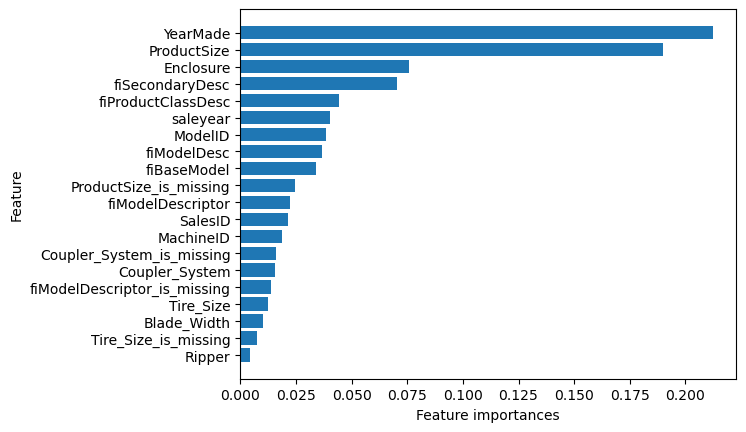

In [175]:
feature_columns(x_train_columns, ideal_model.feature_importances_)